## Import libraries

In [87]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns


## import libraries 


In [88]:
df= pd.read_csv('car_evaluation.csv' , header = None)

## Exploratory Data Analysis :

In [89]:
# now , i will explore the data to gain insights about the data 

# view the dimensions of dataset 
df.shape

(1728, 7)

In [90]:
# view the 5 top rows 
df.head()

,0,1,2,3,4,5,6
0,vhigh,vhigh,2,2,small,low,unacc
1,vhigh,vhigh,2,2,small,med,unacc
2,vhigh,vhigh,2,2,small,high,unacc
3,vhigh,vhigh,2,2,med,low,unacc
4,vhigh,vhigh,2,2,med,med,unacc


In [91]:
# rename the columns names 
col_names=['buying','maint','doors','persons','lug_boot','safety','class']

df.columns = col_names
col_names

['buying', 'maint', 'doors', 'persons', 'lug_boot', 'safety', 'class']

In [92]:
# let's again preview the dataset 
df.head()

,buying,maint,doors,persons,lug_boot,safety,class
0,vhigh,vhigh,2,2,small,low,unacc
1,vhigh,vhigh,2,2,small,med,unacc
2,vhigh,vhigh,2,2,small,high,unacc
3,vhigh,vhigh,2,2,med,low,unacc
4,vhigh,vhigh,2,2,med,med,unacc


In [93]:
# view summary of dataset

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1728 entries, 0 to 1727
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   buying    1728 non-null   object
 1   maint     1728 non-null   object
 2   doors     1728 non-null   object
 3   persons   1728 non-null   object
 4   lug_boot  1728 non-null   object
 5   safety    1728 non-null   object
 6   class     1728 non-null   object
dtypes: object(7)
memory usage: 94.6+ KB


In [94]:
for col in col_names:
    print(df[col].value_counts())
    print("-----------------------")

buying
vhigh    432
high     432
med      432
low      432
Name: count, dtype: int64
-----------------------
maint
vhigh    432
high     432
med      432
low      432
Name: count, dtype: int64
-----------------------
doors
2        432
3        432
4        432
5more    432
Name: count, dtype: int64
-----------------------
persons
2       576
4       576
more    576
Name: count, dtype: int64
-----------------------
lug_boot
small    576
med      576
big      576
Name: count, dtype: int64
-----------------------
safety
low     576
med     576
high    576
Name: count, dtype: int64
-----------------------
class
unacc    1210
acc       384
good       69
vgood      65
Name: count, dtype: int64
-----------------------


In [95]:
# the target is (class)

df['class'].value_counts()

class
unacc    1210
acc       384
good       69
vgood      65
Name: count, dtype: int64

In [96]:
# check missing values in variables 

df.isnull().sum()

buying      0
maint       0
doors       0
persons     0
lug_boot    0
safety      0
class       0
dtype: int64

In [97]:
df.tail()

,buying,maint,doors,persons,lug_boot,safety,class
1723,low,low,5more,more,med,med,good
1724,low,low,5more,more,med,high,vgood
1725,low,low,5more,more,big,low,unacc
1726,low,low,5more,more,big,med,good
1727,low,low,5more,more,big,high,vgood


In [98]:
x = df.drop(['class'] , axis=1)
y = df['class']

In [99]:
x

,buying,maint,doors,persons,lug_boot,safety
0,vhigh,vhigh,2,2,small,low
1,vhigh,vhigh,2,2,small,med
2,vhigh,vhigh,2,2,small,high
3,vhigh,vhigh,2,2,med,low
4,vhigh,vhigh,2,2,med,med
...,...,...,...,...,...,...
1723,low,low,5more,more,med,med
1724,low,low,5more,more,med,high
1725,low,low,5more,more,big,low
1726,low,low,5more,more,big,med


In [100]:
from sklearn.preprocessing import OrdinalEncoder
# encode categorical variables with Ordinal encoding 

ordinal= OrdinalEncoder()
X= ordinal.fit_transform(x)

In [101]:
X = pd.DataFrame(X)

In [102]:
X.head()

,0,1,2,3,4,5
0,3.0,3.0,0.0,0.0,2.0,1.0
1,3.0,3.0,0.0,0.0,2.0,2.0
2,3.0,3.0,0.0,0.0,2.0,0.0
3,3.0,3.0,0.0,0.0,1.0,1.0
4,3.0,3.0,0.0,0.0,1.0,2.0


In [103]:
col_names=['buying', 'maint', 'doors', 'persons', 'lug_boot', 'safety']

In [104]:
X.columns = col_names

In [ ]:
X.head()s

,buying,maint,doors,persons,lug_boot,safety
0,3.0,3.0,0.0,0.0,2.0,1.0
1,3.0,3.0,0.0,0.0,2.0,2.0
2,3.0,3.0,0.0,0.0,2.0,0.0
3,3.0,3.0,0.0,0.0,1.0,1.0
4,3.0,3.0,0.0,0.0,1.0,2.0


In [106]:
y.head()

0    unacc
1    unacc
2    unacc
3    unacc
4    unacc
Name: class, dtype: object

In [109]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(X,y,test_size=.33 , random_state=42)

In [110]:
x_train.shape , x_test.shape

((1157, 6), (571, 6))

In [111]:
## Random forest classifier model with default parameter 

from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(random_state=0)
rfc.fit(x_train , y_train)
y_pred =rfc.predict(x_test)
# check the accuracy 
from sklearn.metrics import accuracy_score
print(f'Model accuracy score with 10 decision_tree:{accuracy_score(y_test , y_pred)}')

Model accuracy score with 10 decision_tree:0.9544658493870403


In [114]:
# what about Random forest classifier model with Parameter n_estimators = 100 

rfc_10 = RandomForestClassifier(n_estimators=10 , random_state=0)
rfc_10.fit(x_train , y_train)
y_pred_10 = rfc_10.predict(x_test)

print(f"model accurcy score with 10 decision trees : {accuracy_score(y_test, y_pred_10): 0.4f}")

model accurcy score with 10 decision trees :  0.9475


In [115]:
# find important feature with Random forest model 
clf = RandomForestClassifier(n_estimators=10 , random_state=0)
clf.fit(x_train,y_train)

RandomForestClassifier(n_estimators=10, random_state=0)

In [118]:
# now , i will use feature importance variable to see feature importance scores 

# view the feature score (how the feature important)
feature_scores =pd.Series(clf.feature_importances_ , index = x_train.columns ).sort_values(ascending=False)

In [119]:
feature_scores

safety      0.255191
buying      0.248719
persons     0.223529
maint       0.120898
lug_boot    0.083210
doors       0.068453
dtype: float64

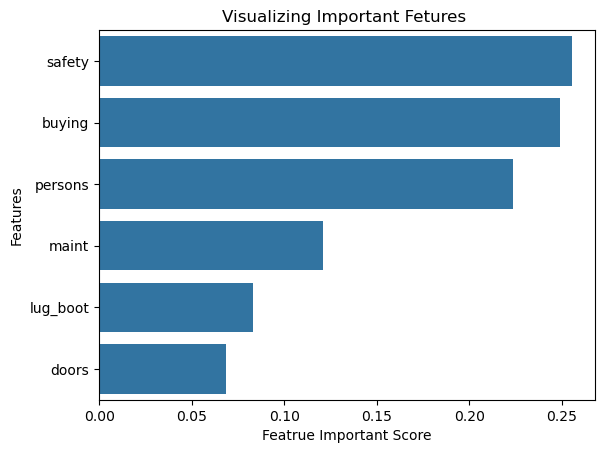

In [123]:
# Visualize feature scores of the feature 
sns.barplot(x=feature_scores , y=feature_scores.index)
plt.xlabel('Featrue Important Score')
plt.ylabel('Features')
plt.title("Visualizing Important Fetures ")
plt.show()

In [124]:
# Build Random Forest model on selected feature .. 

x = X.drop(['doors'] , axis=1)
y = df['class']

In [125]:
# split data into training and testing sets 
from sklearn.model_selection import train_test_split
x_train , x_test , y_train , y_test = train_test_split(x,y,test_size=.33 , random_state=42)


In [126]:
# using random forest 

clf = RandomForestClassifier( n_estimators=10,random_state=0)
clf.fit(x_train, y_train)

RandomForestClassifier(n_estimators=10, random_state=0)

In [127]:
y_pred = clf.predict(x_test)

In [128]:
print(f"Model accuracy score with doors variable removed : {accuracy_score(y_test , y_pred):.4f}")

Model accuracy score with doors variable removed : 0.9264


In [130]:
# confusion matrix 
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test , y_pred)

print(f"the confusion matrix\n {cm}")


the confusion matrix
 [[107  12   7   3]
 [  0  17   1   2]
 [ 10   0 387   0]
 [  3   4   0  18]]


In [131]:
## classification report 

from sklearn.metrics import classification_report 
print(classification_report(y_test , y_pred))

              precision    recall  f1-score   support

         acc       0.89      0.83      0.86       129
        good       0.52      0.85      0.64        20
       unacc       0.98      0.97      0.98       397
       vgood       0.78      0.72      0.75        25

    accuracy                           0.93       571
   macro avg       0.79      0.84      0.81       571
weighted avg       0.93      0.93      0.93       571

